# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração e download do dataset

In [2]:
import os

os.environ["KAGGLE_KEY"] = 'KAGGLE_KEY'
os.environ["KAGGLE_USERNAME"] = 'KAGGLE_USERNAME'

In [3]:
!kaggle datasets download surajjha101/top-instagram-influencers-data-cleaned
!unzip -q top-instagram-influencers-data-cleaned.zip -d ./top-instagram-influencers/

Dataset URL: https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned
License(s): CC0-1.0
  0% 0.00/5.89k [00:00<?, ?B/s]
100% 5.89k/5.89k [00:00<00:00, 7.58MB/s]


# Carregamento e exploração dos dados

In [4]:
df = pd.read_csv('/content/top-instagram-influencers/top_insta_influencers_data.csv')

In [5]:
print(df.head())
print(df.info())
print(df.describe())
print("Valores ausentes por coluna:\n", df.isnull().sum())

   rank channel_info  influence_score  posts followers avg_likes  \
0     1    cristiano               92   3.3k    475.8m      8.7m   
1     2  kyliejenner               91   6.9k    366.2m      8.3m   
2     3     leomessi               90  0.89k    357.3m      6.8m   
3     4  selenagomez               93   1.8k    342.7m      6.2m   
4     5      therock               91   6.8k    334.1m      1.9m   

  60_day_eng_rate new_post_avg_like total_likes        country  
0           1.39%              6.5m       29.0b          Spain  
1           1.62%              5.9m       57.4b  United States  
2           1.24%              4.4m        6.0b            NaN  
3           0.97%              3.3m       11.5b  United States  
4           0.20%            665.3k       12.5b  United States  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0

In [6]:
df = df.dropna(subset=['country'])

In [20]:
print(X_train.isnull().sum())  # Checar valores ausentes em X_train
print(y_train.isnull().sum())  # Checar valores ausentes em y_train
print(X_train.dtypes)  # Verificar tipos de dados
print(y_train.dtypes)  # Verificar tipos de dados


influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
dtype: int64
0
influence_score        int64
posts                 object
followers            float64
avg_likes            float64
60_day_eng_rate       object
new_post_avg_like     object
total_likes          float64
dtype: object
int8


In [21]:
# Ver os valores únicos em cada coluna problemática
print(df['posts'].unique())
print(df['60_day_eng_rate'].unique())
print(df['new_post_avg_like'].unique())

['3.3k' '6.9k' '1.8k' '6.8k' '5.6k' '5.0k' '2.0k' '4.1k' '7.4k' '0.66k'
 '10.0k' '0.95k' '0.53k' '3.2k' '6.4k' '4.4k' '5.3k' '8.2k' '3.5k' '1.6k'
 '0.08k' '4.8k' '5.2k' '7.3k' '1.3k' '1.7k' '3.6k' '1.5k' '2.9k' '2.3k'
 '12.9k' '2.5k' '0.54k' '0.26k' '0.34k' '1.2k' '1.0k' '7.0k' '0.78k'
 '1.4k' '17.5k' '5.1k' '2.4k' '9.9k' '2.7k' '0.28k' '0.88k' '0.42k' '2.1k'
 '10.3k' '1.1k' '8.9k' '6.5k' '0.17k' '0.59k' '4.2k' '0.16k' '0.02k'
 '16.9k' '4.9k' '1.9k' '0.58k' '3.0k' '4.5k' '11.6k' '13.4k' '0.50k'
 '0.38k' '0.87k' '0.03k' '7.6k' '0.11k' '6.3k' '9.3k' '0.37k' '3.8k'
 '0.77k']
['1.39%' '1.62%' '0.97%' '0.20%' '0.88%' '1.20%' '0.76%' '0.35%' '0.59%'
 '2.04%' '0.07%' '0.08%' '1.01%' '0.62%' '0.53%' '0.67%' '1.09%' '3.17%'
 '1.10%' '0.27%' '0.02%' '0.48%' '0.22%' '1.26%' '0.69%' '0.60%' '1.53%'
 '1.00%' '2.56%' '0.46%' '0.04%' '0.54%' '0.28%' '2.87%' '3.01%' '3.14%'
 '2.23%' '0.49%' '0.01%' '5.40%' '2.25%' '0.51%' '0.30%' '2.19%' '0.58%'
 '1.12%' '1.15%' '0.52%' '0.41%' '0.44%' '0.78%' '8.63%'

In [22]:
# Função para converter os valores em formato numérico
def converter_para_numerico(valor):
    try:
        if isinstance(valor, str):  # Verifica se é uma string
            if 'k' in valor:  # Conversão de "k" para milhares
                return float(valor.replace('k', '')) * 1e3
            elif 'm' in valor:  # Conversão de "m" para milhões
                return float(valor.replace('m', '')) * 1e6
            elif '%' in valor:  # Conversão de "%" para decimal
                return float(valor.replace('%', '')) / 100
        return float(valor)  # Retorna o valor como float diretamente
    except:
        return np.nan  # Retorna NaN se não puder converter

In [23]:
colunas_problema = ['posts', '60_day_eng_rate', 'new_post_avg_like']

for coluna in colunas_problema:
    df[coluna] = df[coluna].apply(converter_para_numerico)

In [24]:
print(df.dtypes)
print(df.isnull().sum())  # Verificar se há valores ausentes

rank                   int64
channel_info          object
influence_score        int64
posts                float64
followers            float64
avg_likes            float64
60_day_eng_rate      float64
new_post_avg_like    float64
total_likes          float64
country                 int8
dtype: object
rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64


In [25]:
colunas_numericas = ['followers', 'avg_likes', 'total_likes']
df[colunas_numericas] = df[colunas_numericas].applymap(converter_para_numerico)

<ipython-input-25-0b0487d7d8d8>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[colunas_numericas] = df[colunas_numericas].applymap(converter_para_numerico)


In [26]:
scaler = StandardScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

In [27]:
df['country'] = df['country'].astype('category').cat.codes

In [28]:
valid_classes = df['country'].value_counts()[df['country'].value_counts() > 1].index
df_filtered = df[df['country'].isin(valid_classes)]

In [29]:
X = df_filtered[['influence_score', 'posts', 'followers', 'avg_likes',
                 '60_day_eng_rate', 'new_post_avg_like', 'total_likes']]
y = df_filtered['country']

# Separando em treino e validação

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [46]:
print("Amostra dos dados de treino:\n", X_train.head())
print("Distribuição das classes:\n", y_train.value_counts())

Amostra dos dados de treino:
      influence_score    posts  followers  avg_likes  60_day_eng_rate  \
75                80    280.0  -0.323587   1.637090           0.0863   
107               82   6500.0  -0.433818  -0.891337           0.0008   
159               75  13400.0  -0.556436  -0.883632           0.0013   
196               81   3800.0  -0.625795  -0.719684           0.0064   
118               82    160.0  -0.461067   2.094133           0.0881   

     new_post_avg_like  total_likes  region  
75           5000000.0    -0.424996       0  
107            40500.0     3.004894       0  
159            49100.0    -0.424996       0  
196           208000.0    -0.424996       0  
118          4000000.0     2.794689       0  
Distribuição das classes:
 country
23    53
2     10
10     9
11     6
8      5
17     4
22     3
14     2
4      2
5      2
13     2
20     2
Name: count, dtype: int64


# Treinamento

In [48]:
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [49]:
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='balanced_accuracy',
    n_jobs=-1
)

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
y_pred = knn_optimized.predict(X_test)
accuracy = knn_optimized.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

<ipython-input-53-55ea89295241>:5: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(mse)


# Resultados

In [54]:
print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Acurácia: 52.00%
MAE: 6.92
MSE: -16.28
RMSE: nan


In [55]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.52      1.00      0.68        13

    accuracy                           0.52        25
   macro avg       0.06      0.11      0.08        25
weighted avg       0.27      0.52      0.36        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


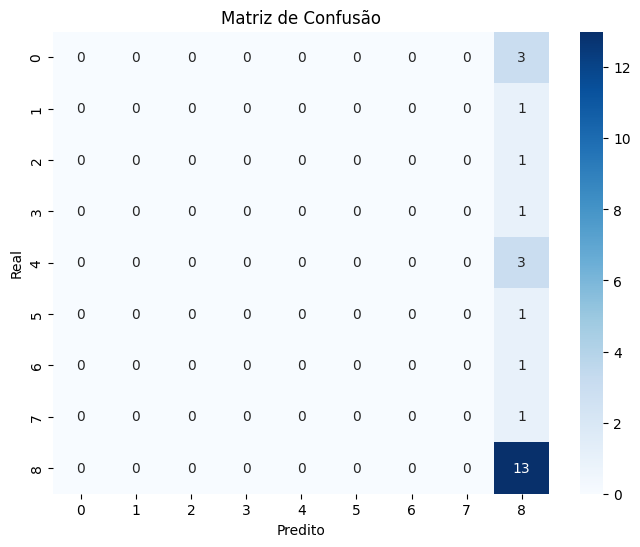

In [40]:
# Matriz de Confusão
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

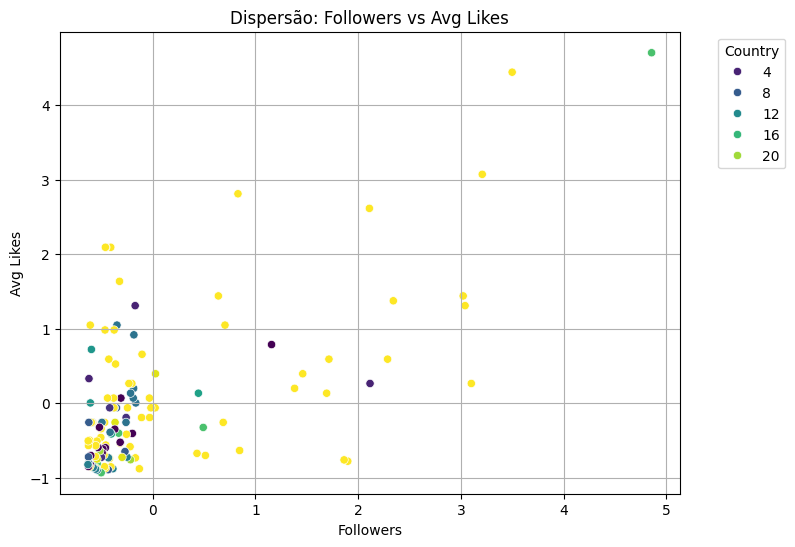

In [41]:
# Visualização de dispersão Followers x Avg Likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='followers', y='avg_likes', hue='country', palette='viridis')
plt.title('Dispersão: Followers vs Avg Likes')
plt.xlabel('Followers')
plt.ylabel('Avg Likes')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

<ipython-input-42-96b667662790>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtered, x='influence_score', y='country', palette='coolwarm', ci=None)
<ipython-input-42-96b667662790>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='influence_score', y='country', palette='coolwarm', ci=None)


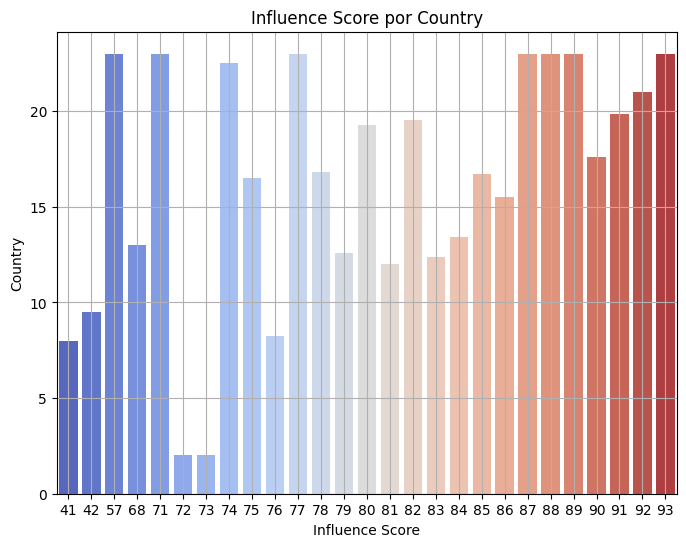

In [42]:
# Visualização do impacto do Influence Score por rank
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filtered, x='influence_score', y='country', palette='coolwarm', ci=None)
plt.title('Influence Score por Country')
plt.xlabel('Influence Score')
plt.ylabel('Country')
plt.grid(True)
plt.show()

# Otimização de Hiperparâmetros com GridSearchCV e Lidando com Regiões Específicas (Asia, Oceania, Africa)

In [56]:

scaler = StandardScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

# Mapeamento de regiões
region_mapping = {
    'India': 'Asia', 'Indonesia': 'Asia',
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    'South Africa': 'Africa', 'Nigeria': 'Africa'
}
df['region'] = df['country'].map(region_mapping).fillna('Other')
df['region'] = df['region'].astype('category').cat.codes

df['country'] = df['country'].astype('category').cat.codes



# Separando em treino e validação

In [57]:
valid_classes = df['country'].value_counts()[df['country'].value_counts() > 1].index
df_filtered = df[df['country'].isin(valid_classes)]


X = df_filtered[['influence_score', 'posts', 'followers', 'avg_likes',
                 '60_day_eng_rate', 'new_post_avg_like', 'total_likes', 'region']]
y = df_filtered['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Amostra dos dados de treino:\n", X_train.head())
print("Distribuição das classes:\n", y_train.value_counts())


Amostra dos dados de treino:
      influence_score    posts  followers  avg_likes  60_day_eng_rate  \
75                80    280.0  -0.323587   1.637090           0.0863   
107               82   6500.0  -0.433818  -0.891337           0.0008   
159               75  13400.0  -0.556436  -0.883632           0.0013   
196               81   3800.0  -0.625795  -0.719684           0.0064   
118               82    160.0  -0.461067   2.094133           0.0881   

     new_post_avg_like  total_likes  region  
75           5000000.0    -0.424996       0  
107            40500.0     3.004894       0  
159            49100.0    -0.424996       0  
196           208000.0    -0.424996       0  
118          4000000.0     2.794689       0  
Distribuição das classes:
 country
23    53
2     10
10     9
11     6
8      5
17     4
22     3
14     2
4      2
5      2
13     2
20     2
Name: count, dtype: int64


# Treinamento do modelo

In [58]:
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Melhores parâmetros: {best_params}")
knn_optimized = grid_search.best_estimator_


y_pred = knn_optimized.predict(X_test)
accuracy = knn_optimized.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Melhores parâmetros: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


<ipython-input-58-de707a37d548>:20: RuntimeWarning: invalid value encountered in sqrt
  rmse = np.sqrt(mse)


# Resultados

In [60]:
print(f"Acurácia: {accuracy * 100:.2f}%")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



Acurácia: 52.00%
MAE: 6.92
MSE: -16.28
RMSE: nan

Relatório de Classificação:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.52      1.00      0.68        13

    accuracy                           0.52        25
   macro avg       0.06      0.11      0.08        25
weighted avg       0.27      0.52      0.36        25



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


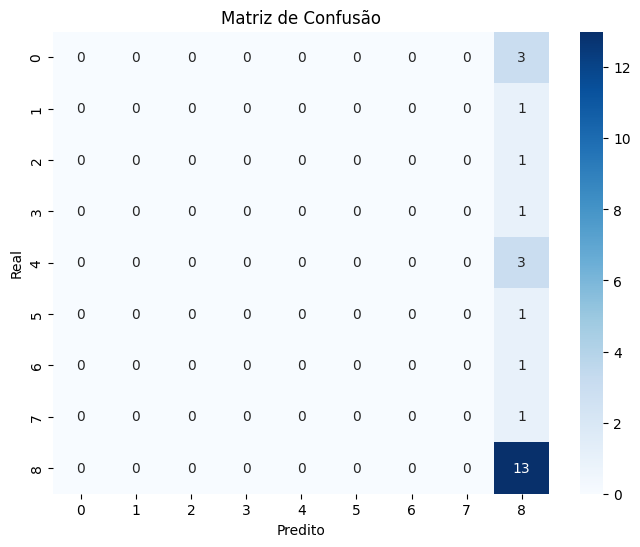

In [61]:
# Matriz de Confusão
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()



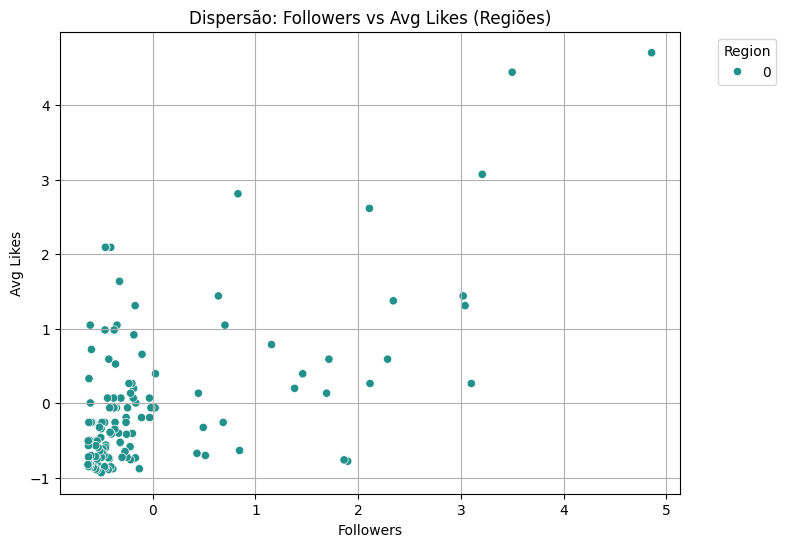

In [62]:
# Visualização de dispersão Followers x Avg Likes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='followers', y='avg_likes', hue='region', palette='viridis')
plt.title('Dispersão: Followers vs Avg Likes (Regiões)')
plt.xlabel('Followers')
plt.ylabel('Avg Likes')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



<ipython-input-63-899e02d82444>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_filtered, x='region', y='influence_score', palette='coolwarm', ci=None)
<ipython-input-63-899e02d82444>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='region', y='influence_score', palette='coolwarm', ci=None)


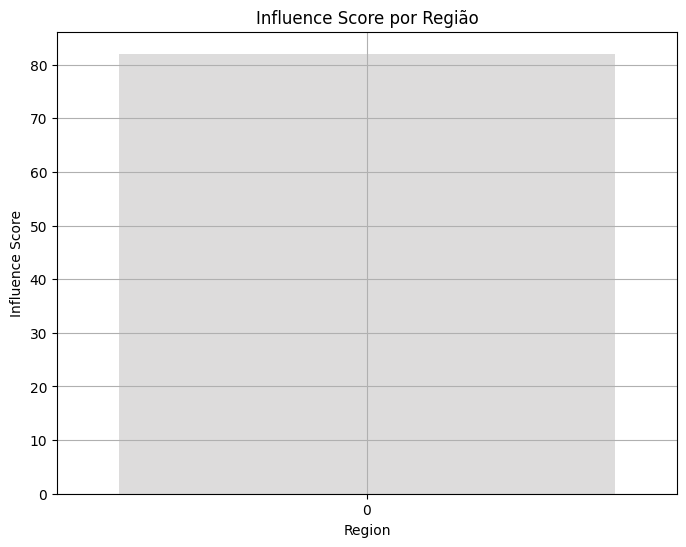

In [63]:
# Visualização do impacto do Influence Score por região
plt.figure(figsize=(8, 6))
sns.barplot(data=df_filtered, x='region', y='influence_score', palette='coolwarm', ci=None)
plt.title('Influence Score por Região')
plt.xlabel('Region')
plt.ylabel('Influence Score')
plt.grid(True)
plt.show()